# Task 8: Тепловая карта (heatmap)

In [1]:
 import seaborn as sns
 import numpy as np
 import pandas as pd
 import sqlite3
 import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
conn = sqlite3.connect('/content/drive/MyDrive/School21/d12/data/checking-logs.sqlite')

In [4]:
df = '''

SELECT uid, timestamp FROM checker WHERE uid LIKE "user_%" AND status = 'ready'

'''
commit_df = pd.read_sql(df, conn, parse_dates='timestamp')

commit_df

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:45.549397
2,user_4,2020-04-17 05:34:24.422370
3,user_4,2020-04-17 05:43:27.773992
4,user_4,2020-04-17 05:46:32.275104
...,...,...
1681,user_19,2020-05-21 20:01:48.959966
1682,user_1,2020-05-21 20:18:54.487900
1683,user_1,2020-05-21 20:19:06.872761
1684,user_1,2020-05-21 20:22:41.877806


In [5]:
commit_df['hour'] = commit_df.timestamp.dt.hour
commit_df['day'] = commit_df.timestamp.dt.day_name()

commit_df

,uid,timestamp,hour,day
0,user_4,2020-04-17 05:19:02.744528,5,Friday
1,user_4,2020-04-17 05:22:45.549397,5,Friday
2,user_4,2020-04-17 05:34:24.422370,5,Friday
3,user_4,2020-04-17 05:43:27.773992,5,Friday
4,user_4,2020-04-17 05:46:32.275104,5,Friday
...,...,...,...,...
1681,user_19,2020-05-21 20:01:48.959966,20,Thursday
1682,user_1,2020-05-21 20:18:54.487900,20,Thursday
1683,user_1,2020-05-21 20:19:06.872761,20,Thursday
1684,user_1,2020-05-21 20:22:41.877806,20,Thursday


In [6]:
commit_df['hour'].value_counts().sort_index(ascending=True)

0       7
1       3
3       2
5       9
6       2
7      26
8      37
9      30
10     83
11    108
12     72
13     96
14    112
15    133
16    124
17    129
18    123
19    166
20    158
21    186
22     54
23     26
Name: hour, dtype: int64

In [7]:
# отсутствуют часы - 2 и 4

In [8]:
# 6. Отсортируйте датафреймы по общему числу коммитов, сделанных пользователем.

df_every_hour = commit_df.groupby(['uid', 'hour'], as_index=False).agg({'timestamp': 'count'}).pivot(index='uid', columns='hour', values='timestamp')

df_every_hour

hour,0,1,3,5,6,7,8,9,10,11,...,14,15,16,17,18,19,20,21,22,23
uid,,,,,,,,,,,,,,,,,,,,,
user_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
user_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,5.0,NaN,11.0,19.0,8.0,1.0,NaN
user_10,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,2.0,...,3.0,NaN,8.0,6.0,3.0,15.0,13.0,12.0,1.0,NaN
user_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0
user_12,NaN,NaN,1.0,NaN,NaN,NaN,6.0,5.0,5.0,6.0,...,4.0,1.0,2.0,6.0,1.0,2.0,NaN,2.0,NaN,NaN
user_13,NaN,NaN,NaN,NaN,1.0,10.0,6.0,5.0,4.0,2.0,...,NaN,2.0,1.0,4.0,5.0,8.0,5.0,1.0,3.0,1.0
user_14,2.0,3.0,NaN,NaN,NaN,2.0,3.0,2.0,1.0,1.0,...,1.0,13.0,6.0,20.0,14.0,12.0,13.0,17.0,11.0,6.0
user_15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,1.0,NaN,1.0,3.0,3.0,7.0,1.0,NaN,NaN
user_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,NaN,NaN,NaN,2.0,11.0,6.0,4.0,NaN


In [9]:
# добавляем столбцы hour = 2 & hour=4 

In [10]:
df_every_hour[2] = np.nan
df_every_hour

hour,0,1,3,5,6,7,8,9,10,11,...,15,16,17,18,19,20,21,22,23,2
uid,,,,,,,,,,,,,,,,,,,,,
user_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,5.0,NaN,11.0,19.0,8.0,1.0,NaN,NaN
user_10,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,2.0,...,NaN,8.0,6.0,3.0,15.0,13.0,12.0,1.0,NaN,NaN
user_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,NaN
user_12,NaN,NaN,1.0,NaN,NaN,NaN,6.0,5.0,5.0,6.0,...,1.0,2.0,6.0,1.0,2.0,NaN,2.0,NaN,NaN,NaN
user_13,NaN,NaN,NaN,NaN,1.0,10.0,6.0,5.0,4.0,2.0,...,2.0,1.0,4.0,5.0,8.0,5.0,1.0,3.0,1.0,NaN
user_14,2.0,3.0,NaN,NaN,NaN,2.0,3.0,2.0,1.0,1.0,...,13.0,6.0,20.0,14.0,12.0,13.0,17.0,11.0,6.0,NaN
user_15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,1.0,NaN,1.0,3.0,3.0,7.0,1.0,NaN,NaN,NaN
user_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,2.0,11.0,6.0,4.0,NaN,NaN


In [11]:
df_every_hour[4] = np.nan
df_every_hour

hour,0,1,3,5,6,7,8,9,10,11,...,16,17,18,19,20,21,22,23,2,4
uid,,,,,,,,,,,,,,,,,,,,,
user_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,5.0,NaN,11.0,19.0,8.0,1.0,NaN,NaN,NaN
user_10,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,2.0,...,8.0,6.0,3.0,15.0,13.0,12.0,1.0,NaN,NaN,NaN
user_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,NaN,NaN
user_12,NaN,NaN,1.0,NaN,NaN,NaN,6.0,5.0,5.0,6.0,...,2.0,6.0,1.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN
user_13,NaN,NaN,NaN,NaN,1.0,10.0,6.0,5.0,4.0,2.0,...,1.0,4.0,5.0,8.0,5.0,1.0,3.0,1.0,NaN,NaN
user_14,2.0,3.0,NaN,NaN,NaN,2.0,3.0,2.0,1.0,1.0,...,6.0,20.0,14.0,12.0,13.0,17.0,11.0,6.0,NaN,NaN
user_15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,1.0,3.0,3.0,7.0,1.0,NaN,NaN,NaN,NaN
user_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,11.0,6.0,4.0,NaN,NaN,NaN


In [12]:
df_every_hour['total'] = df_every_hour.sum(axis=1)

In [13]:
df_every_hour

hour,0,1,3,5,6,7,8,9,10,11,...,17,18,19,20,21,22,23,2,4,total
uid,,,,,,,,,,,,,,,,,,,,,
user_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
user_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,11.0,19.0,8.0,1.0,NaN,NaN,NaN,46.0
user_10,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,2.0,...,6.0,3.0,15.0,13.0,12.0,1.0,NaN,NaN,NaN,71.0
user_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,1.0,NaN,NaN,5.0
user_12,NaN,NaN,1.0,NaN,NaN,NaN,6.0,5.0,5.0,6.0,...,6.0,1.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,49.0
user_13,NaN,NaN,NaN,NaN,1.0,10.0,6.0,5.0,4.0,2.0,...,4.0,5.0,8.0,5.0,1.0,3.0,1.0,NaN,NaN,60.0
user_14,2.0,3.0,NaN,NaN,NaN,2.0,3.0,2.0,1.0,1.0,...,20.0,14.0,12.0,13.0,17.0,11.0,6.0,NaN,NaN,132.0
user_15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,1.0,3.0,3.0,7.0,1.0,NaN,NaN,NaN,NaN,17.0
user_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,11.0,6.0,4.0,NaN,NaN,NaN,32.0


In [14]:
df_every_hour = df_every_hour.sort_values('total', ascending=False).drop(columns='total').transpose().fillna(0)
df_every_hour

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_22,user_11,user_7,user_23,user_0
hour,,,,,,,,,,,,,,,,,,,,,
0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,7.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,2.0,3.0,0.0,0.0,6.0,1.0,0.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,3.0,0.0,0.0,0.0,3.0,1.0,0.0,5.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
9,0.0,2.0,7.0,0.0,0.0,2.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0
10,13.0,1.0,21.0,9.0,11.0,8.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df_new = df_every_hour
df_new

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_22,user_11,user_7,user_23,user_0
hour,,,,,,,,,,,,,,,,,,,,,
0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,7.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,2.0,3.0,0.0,0.0,6.0,1.0,0.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,3.0,0.0,0.0,0.0,3.0,1.0,0.0,5.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
9,0.0,2.0,7.0,0.0,0.0,2.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0
10,13.0,1.0,21.0,9.0,11.0,8.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df_new.sort_index(inplace=True)
df_new

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_22,user_11,user_7,user_23,user_0
hour,,,,,,,,,,,,,,,,,,,,,
0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,7.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,2.0,3.0,0.0,0.0,6.0,1.0,0.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,3.0,0.0,0.0,0.0,3.0,1.0,0.0,5.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [17]:
df_every_day = commit_df.groupby(['uid', 'day'], as_index=False).agg({'timestamp': 'count'}).pivot(index='uid', columns='day', values='timestamp')

In [18]:
df_every_day['total'] = df_every_day.sum(axis=1)

In [19]:
days_week = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_every_day = df_every_day.sort_values('total', ascending=False).drop(columns='total').transpose().fillna(0).reindex(days_week)

df_every_day

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_22,user_11,user_7,user_23,user_0
day,,,,,,,,,,,,,,,,,,,,,
Monday,18.0,25.0,12.0,8.0,4.0,0.0,12.0,3.0,0.0,23.0,...,4.0,6.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,2.0
Tuesday,43.0,44.0,67.0,22.0,5.0,1.0,0.0,0.0,9.0,6.0,...,2.0,3.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0
Wednesday,17.0,0.0,16.0,8.0,0.0,17.0,4.0,0.0,19.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0
Thursday,54.0,9.0,2.0,20.0,40.0,26.0,48.0,5.0,38.0,5.0,...,10.0,7.0,8.0,3.0,1.0,1.0,0.0,0.0,4.0,0.0
Friday,32.0,0.0,0.0,6.0,5.0,1.0,4.0,18.0,1.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Saturday,0.0,41.0,17.0,33.0,11.0,10.0,2.0,45.0,3.0,2.0,...,18.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0
Sunday,24.0,13.0,7.0,23.0,26.0,35.0,16.0,4.0,1.0,5.0,...,0.0,16.0,15.0,11.0,5.0,1.0,5.0,0.0,0.0,0.0


Text(0.5, 5.09375, '')

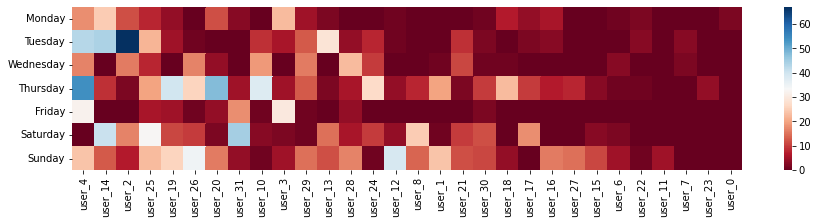

In [20]:
fig, ax = plt.subplots(figsize=(15, 3))

sns.heatmap(df_every_day, ax=ax, cmap='RdBu')
ax.set_ylabel('')    
ax.set_xlabel('')

Text(0.5, 50.09375, '')

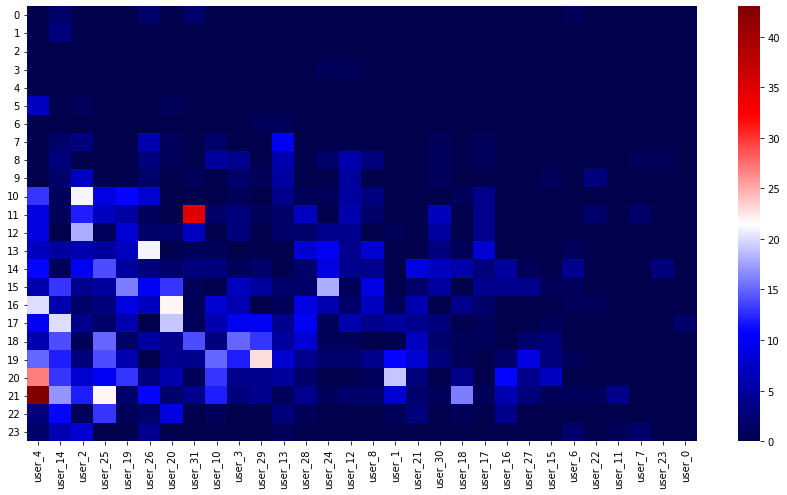

In [21]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.heatmap(df_new, ax= ax, cmap='seismic')
plt.yticks(rotation = 0)
ax.set_ylabel('')    
ax.set_xlabel('')

In [22]:
conn.close

<function Connection.close>

«У какого пользователя больше всего коммитов во вторник?». Ответ: user_2.


«У какого пользователя больше всего коммитов в четверг?». Ответ: user_4.

 «В какой будний день пользователи не любят делать много коммитов?». Ответ:пятница. 

«Какой пользователь в каком часу сделал наибольшее количество коммитов?». Ответ: user_4, 21.